In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from glob import glob
from configs import *
from tqdm import tqdm
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from dataset import *
tqdm.monitor_interval = 0
import torch
import torch.nn as nn
import numpy as np
torch.manual_seed(0)
np.random.seed(0)

In [4]:
FORECAST = 5
EPS = 120
LAG = 12
SROUTE = SAMPLE_ROUTES[0]
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=1)

In [5]:
dset = Routes('train', 32, lag=LAG).generator()
evalset = Routes('test', 32, lag=LAG).generator()

Routes dataset: train
 [*] Loaded routes: 242 (0.23s)
 [*] Subset train: 222 (reserved_routes.json)
 [*] Loaded trainable inds: 188412 (0.18s)
Routes dataset: test
 [*] Loaded routes: 242 (0.35s)
 [*] Subset test: 20 (reserved_routes.json)
 [*] Loaded trainable inds: 44919 (0.02s)


In [6]:
from models.Linear import Linear

In [7]:
model = Linear(lag=LAG).to(device)
model.device = device

In [8]:
criterion, opt, sch = model.params(lr=0.001)

In [9]:
evaluate(evalset, model, criterion)

Eval loss: 55.77151149901909


In [10]:
losses = []
eval_losses = []
for eii  in range(EPS):
    for bii, batch in enumerate(dset):
        model.train()
        Xs, Ys = model.format_batch(batch)
        outputs = model(Xs)

        opt.zero_grad()
        loss = criterion(outputs, Ys)
        loss.backward()
        losses.append(loss.item())
        opt.step()

        sys.stdout.write('[%d/%d : %d/%d] - L%.2f      \r' % (
            eii+1, EPS,
            bii+1, len(dset), 
            loss.item()
        ))
    sys.stdout.write('\n')

    eval_losses.append(evaluate(evalset, model, criterion, result=True))
#     torch.save(model.state_dict(), 'checkpoints/%s_e%d.pth' % (model.name, eii+1))
    sys.stdout.flush()
    sch.step()

[1/120 : 5888/5888] - L19.86        
Eval loss: 15.517816533390274
[2/120 : 5888/5888] - L6.60         
Eval loss: 13.364955534962167
[3/120 : 5888/5888] - L5.81         
Eval loss: 16.221822495813722
[4/120 : 5888/5888] - L5.14         
Eval loss: 7.953646697719552
[5/120 : 5888/5888] - L5.22         
Eval loss: 8.183270266592672
[6/120 : 5888/5888] - L5.07         
Eval loss: 7.7781777797940785
[7/120 : 5888/5888] - L5.05         
Eval loss: 7.747259927186531
[8/120 : 5888/5888] - L4.37         
Eval loss: 7.725290163884475
[9/120 : 5888/5888] - L3.86         
Eval loss: 7.682851799872526
[10/120 : 5888/5888] - L107.27       
Eval loss: 7.635944113347605
[11/120 : 5888/5888] - L3.88         
Eval loss: 8.091970247760457
[12/120 : 5888/5888] - L3.67         
Eval loss: 7.671873320201863


Process Process-155:
Process Process-151:
Traceback (most recent call last):
Process Process-153:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Process Process-154:
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Process Process-156:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 106, in _worker_loo

Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-2e131a7eb921>", line 4, in <module>
    for bii, batch in enumerate(dset):
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 330, in __next__
    idx, batch = self._get_batch()
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 309, in _get_batch
    return self.data_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 345, in get
    return ForkingPickler.loads(res)
  File "/usr/local/lib/python3.5/dist-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/usr/lib/python3.5/multi

  File "/usr/lib/python3.5/multiprocessing/queues.py", line 104, in get
    if timeout < 0 or not self._poll(timeout):
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 106, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 106, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])



During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.5/site-packages/IPython/core/ultratb.py", line 1095, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/home/ubuntu/.local/lib/python3.5/site-packages/IPython/core/ultratb.py", line 311, in wrapped
    return f(*args, **kwargs)
  File "/home/ubuntu/.local/lib/python3.5/site-packages/IPython/core/ultratb.py", line 345, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/usr/lib/python3.5/inspect.py", line 1453, in getinnerframes
    frameinfo = (tb.tb_frame,) + getframeinfo(tb, context)
  File "/usr/lib/python3.5/inspect.py", line 1410, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/usr/lib/python3.5/inspect.py", line 672, in getsourcefile
    if getattr(getmodule(object, filename), '__loader__', None) 

KeyboardInterrupt: 

  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 106, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/ubuntu/traffic/dataset.py", line 74, in __getitem__
    mat = np.load('data/history/%s.npy' % (rname))
  File "/home/ubuntu/traffic/dataset.py", line 74, in __getitem__
    mat = np.load('data/history/%s.npy' % (rname))
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 106, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 257, in poll
    return self._poll(timeout)
  File "/usr/local/lib/python3.5/dist-packages/numpy/lib/npyio.py", line 440, in load
    pickle_kwargs=pickle_kwargs)
  File "/home/ubuntu/traffic/dataset.py", line 74, in __getitem__
    mat = np.load('data/history/%s.npy' % (rname))
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 106

In [15]:
# torch.save(model.state_dict(), 'checkpoints/tmp_global_linear.pth')

2047


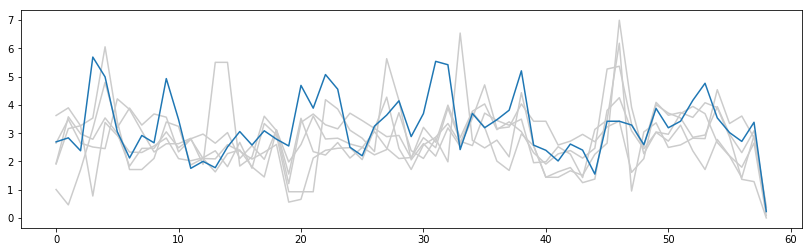

In [11]:
data = history_byname(SROUTE)

sample = data[int(TSTEPS*0.8):]
inds, integs = high_integ(sample[LAG:])
inds += LAG
print(inds[0])
sample = sample[inds[0]-LAG:inds[0]]
for jj, ii in zip(*np.where(np.isnan(sample))):
    sample[jj, ii] = sample[jj-1, ii]
show_context(sample)

In [12]:
preds = []
for bi in range(10, sample.shape[1]+1):
    hist = sample[:, bi-10:bi]
    hist = np.expand_dims(hist, 0)
    hist = torch.from_numpy(hist).to(device).float()
    Xs, _ = model.format_batch(hist)

    yout = model(Xs)
    preds.append(tonpy(yout))

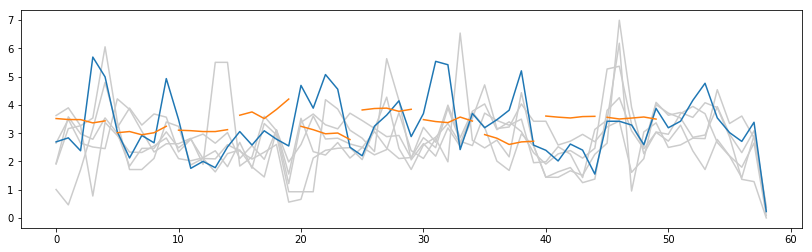

In [14]:
show_context(sample, draw=False)
for bi in range(10, sample.shape[1]+1, 5):
    ylast = preds[bi-10][0]
    xpos = list(range(bi-10, bi-5))
    plt.plot(xpos, ylast, color='C1')
plt.show(); plt.close()